In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


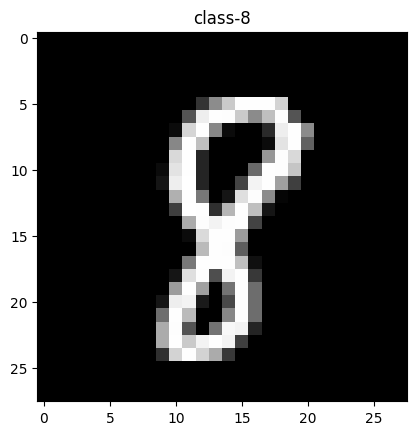

Train image 7035-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  53 140 202 254 254 254
  212   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  84 238 254 253 202 139 191
  253  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  11 213 254 135  11   0   0  42
  238 254 139   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = "/home/sysadm/ML_Assignment/MDS/"# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



In [3]:

def select_samples_per_class(images, labels, num_samples_per_class=600):
    selected_images = []
    selected_labels = []
    class_counts = np.bincount(labels)
    for class_label in range(10): 
        class_indices = np.where(labels == class_label)[0]
        np.random.shuffle(class_indices)
        selected_indices = class_indices[:num_samples_per_class]
        selected_images.extend(images[selected_indices])
        selected_labels.extend(labels[selected_indices])

    return np.array(selected_images), np.array(selected_labels)
x,y = select_samples_per_class(train_images, train_labels)


In [4]:
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def pairwise_distances(data):
    n = data.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = euclidean_distance(data[i], data[j])
    return distance_matrix

In [5]:
def mds(distance_matrix, d=2):
    n = distance_matrix.shape[0]
    V =  np.identity(n) - np.ones((n, n)) / n
    S = -0.5 * np.dot(V, np.dot(distance_matrix ** 2, V))
    
    eigenvalues, eigenvectors = np.linalg.eigh(S)
    
    index = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[index]
    eigenvectors = eigenvectors[:, index]
    eigenvalues = np.maximum(eigenvalues, 0)
    eigenvalues_root = np.sqrt(eigenvalues[:d])
    output = eigenvectors[:, :d] * eigenvalues_root
    
    return output


In [6]:
D = pairwise_distances(x.reshape(x.shape[0], -1))

In [7]:
low_dimensional_representation = mds(D)

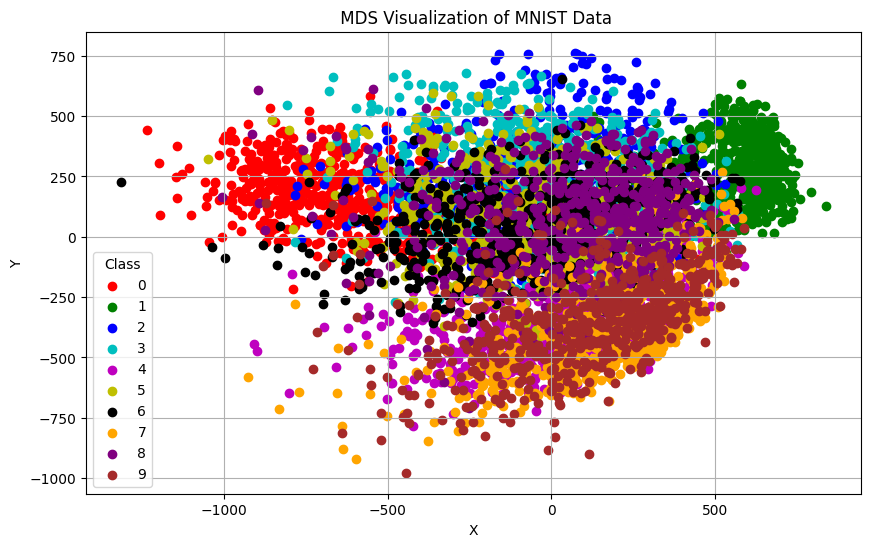

In [8]:
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

plt.figure(figsize=(10, 6))
for class_label in range(10):
    class_indices = np.where(y == class_label)[0]
    class_points = low_dimensional_representation[class_indices]
    plt.scatter(class_points[:, 0], class_points[:, 1], color=colors[class_label], label=str(class_label))

plt.title(" MDS Visualization of MNIST Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title="Class")
plt.grid(True)
plt.show()

In [9]:
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.000000,2120.546628,2467.110253,2473.609306,2465.278483,2119.777111,2341.817030,2177.080384,2517.857025,2342.985275,...,2563.092468,2506.046488,2548.680247,2426.830031,2518.138003,2418.924761,2510.383636,2473.944623,2459.427779,2353.495910
1,2254.882259,0.000000,2557.341393,2549.591536,2424.178624,2176.290192,2481.020153,2160.015509,2648.309650,2445.335151,...,2556.969104,2512.820129,2545.836405,2513.626862,2568.585798,2446.866363,2458.257513,2548.635321,2516.329668,2480.562638
2,2743.704248,2315.574011,0.000000,2383.215475,2741.742329,2489.418406,2467.811176,2700.468848,2297.070961,2452.131114,...,2922.634086,3005.786420,2946.159195,2917.183059,2921.241517,2810.952508,2717.462971,2961.381941,2643.706111,2899.527548
3,2583.063104,2693.054957,2942.538360,0.000000,2946.463134,2477.689246,2552.537953,2869.180719,2502.872150,2618.531077,...,3003.511944,3016.887469,2972.817855,2848.128684,3060.620199,3103.385248,3033.412435,2729.443716,2629.433399,2858.449580
4,2061.990786,2229.439840,2399.459731,2292.118016,0.000000,2200.502897,2139.164557,2186.006176,2312.289342,2110.648242,...,2391.791170,2224.069918,2307.604169,2113.441270,2384.035864,2320.469134,2416.859946,2238.061215,2095.635226,2342.449359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1941.099946,2057.560449,2153.831470,2043.563554,2145.402759,1896.258949,2074.566943,2157.354862,2181.593684,2028.188108,...,1929.923833,1914.702588,1730.376260,1795.879450,1821.985730,0.000000,1634.819562,1844.062635,1881.079477,1820.051648
5996,2370.662777,2719.321607,2955.460878,2367.876475,2210.852324,2102.264731,2484.504578,2643.851925,2674.960187,2341.920579,...,2306.907237,2445.438407,2443.105606,2301.692421,2615.598402,2587.550772,0.000000,1846.615282,1958.505297,2359.983263
5997,2267.026687,2510.583597,2646.293823,2377.657461,2364.650926,2163.697992,2494.525406,2481.738705,2468.419737,2273.249216,...,2048.010010,2196.266605,2064.381505,2043.575788,2378.257976,2242.139826,2338.862117,0.000000,2038.349087,2081.986311
5998,2608.837481,2699.596081,3009.594989,2680.155219,2774.098592,2489.954216,2715.486328,2838.696884,2821.085075,2445.959321,...,2761.709253,2631.425849,2768.216755,2536.792266,2814.615427,2956.066982,2810.056049,2597.128222,0.000000,2543.116985


In [10]:
pd.DataFrame(low_dimensional_representation)

,0,1
0,-606.381626,202.004767
1,-927.382011,469.080544
2,-446.480805,232.167482
3,-670.274398,254.813327
4,-424.924991,64.112982
...,...,...
5995,143.035876,-50.703937
5996,-443.528961,-977.730639
5997,125.353041,-425.759391
5998,-197.406652,-247.385005
